<a href="https://colab.research.google.com/github/kansu-lab/deep_learning_class/blob/master/CNNs_Lab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import tensorflow.keras as tfk
import tensorflow_datasets as tfds
from tensorflow.data.experimental import sample_from_datasets

tfkl = tfk.layers

**Preprocessing**

As typical, we'll start with the MNIST data. Recall from last time, we have to do some transformations and preprocessing on these images.

In [2]:
data, info = tfds.load('mnist', with_info=True)

local data directory. If you'd instead prefer to read directly from our public
GCS bucket (recommended if you're running on GCP), you can instead pass
`try_gcs=True` to `tfds.load` or set `data_dir=gs://tfds-data/datasets`.





Dataset mnist downloaded and prepared to /root/tensorflow_datasets/mnist/3.0.1. Subsequent calls will reuse this data.


In [3]:
preprocess = lambda d: (tf.cast(d["image"], tf.float32)/255, tf.one_hot(d["label"], depth=10))

ds_train = data["train"].map(preprocess).cache().batch(32)
ds_test = data["test"].map(preprocess).cache().batch(32)

In [4]:
img_shape = info.features['image'].shape

In [5]:
img_shape

(28, 28, 1)

**CNNs in TF Keras**

We'll use the Sequential class rely on new layer types that correspond to concepts we covered in lecture: Conv2D, AvgPool2D, MaxPool2D. 

Details such as kernel size, padding, strides and so on must be specified as args to these classes, where appropriate.

In [6]:
model = tfk.Sequential()
model.add(tfkl.Conv2D(filters = 1, kernel_size=(3,3), strides=(1,1), 
                      padding="valid", activation='relu', input_shape=(28, 28, 1)))
model.add(tfkl.MaxPool2D(pool_size=(4,4)))
model.add(tfkl.Flatten())
model.add(tfkl.Dense(10, activation='softmax'))

In [7]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 1)         10        
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 6, 6, 1)           0         
_________________________________________________________________
flatten (Flatten)            (None, 36)                0         
_________________________________________________________________
dense (Dense)                (None, 10)                370       
Total params: 380
Trainable params: 380
Non-trainable params: 0
_________________________________________________________________


In [8]:
model.compile(
    optimizer=tfk.optimizers.RMSprop(),
    loss=tfk.losses.CategoricalCrossentropy(),
)

results = model.fit(ds_train, steps_per_epoch=20, epochs=20, validation_data=ds_test)

Epoch 1/20
20/20 [==============================] - 3s 148ms/step - loss: 2.3099 - val_loss: 2.3062
Epoch 2/20
20/20 [==============================] - 2s 83ms/step - loss: 2.3028 - val_loss: 2.2962
Epoch 3/20
20/20 [==============================] - 2s 81ms/step - loss: 2.2867 - val_loss: 2.2859
Epoch 4/20
20/20 [==============================] - 2s 80ms/step - loss: 2.2831 - val_loss: 2.2739
Epoch 5/20
20/20 [==============================] - 2s 82ms/step - loss: 2.2826 - val_loss: 2.2618
Epoch 6/20
20/20 [==============================] - 2s 81ms/step - loss: 2.2580 - val_loss: 2.2470
Epoch 7/20
20/20 [==============================] - 2s 80ms/step - loss: 2.2425 - val_loss: 2.2305
Epoch 8/20
20/20 [==============================] - 2s 81ms/step - loss: 2.2291 - val_loss: 2.2112
Epoch 9/20
20/20 [==============================] - 2s 80ms/step - loss: 2.2037 - val_loss: 2.1893
Epoch 10/20
20/20 [==============================] - 2s 81ms/step - loss: 2.1787 - val_loss: 2.1657
Epoch 11

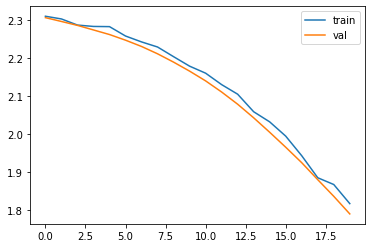

In [9]:
plt.plot(results.history["loss"])
plt.plot(results.history["val_loss"])
plt.legend(labels=["train", "val"])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  """Entry point for launching an IPython kernel.


Text(0.5, 0, 'Probability')

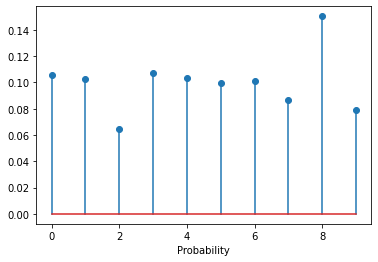

In [10]:
plt.stem(model.predict(ds_test.take(1))[9, :])
plt.xlabel("Digit")
plt.xlabel("Probability")

Which architectural hyperparameters might we change in the above?

### Answer: we could change the filer numbers for the convolution layer, 1 filter in the model is not much. An example shows below. We could also change the filter size. 

In [13]:
model = tfk.Sequential()
model.add(tfkl.Conv2D(filters = 32, kernel_size=(3,3), strides=(1,1), 
                      padding="valid", activation='relu', input_shape=(28, 28, 1)))
model.add(tfkl.MaxPool2D(pool_size=(4,4)))
model.add(tfkl.Flatten())
model.add(tfkl.Dense(10, activation='softmax'))

In [14]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 6, 6, 32)          0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 1152)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 10)                11530     
Total params: 11,850
Trainable params: 11,850
Non-trainable params: 0
_________________________________________________________________


In [15]:
model.compile(
    optimizer=tfk.optimizers.RMSprop(),
    loss=tfk.losses.CategoricalCrossentropy(),
)

results = model.fit(ds_train, steps_per_epoch=20, epochs=20, validation_data=ds_test)

Epoch 1/20
20/20 [==============================] - 2s 102ms/step - loss: 2.1308 - val_loss: 1.9185
Epoch 2/20
20/20 [==============================] - 2s 97ms/step - loss: 1.7218 - val_loss: 1.4672
Epoch 3/20
20/20 [==============================] - 2s 99ms/step - loss: 1.2922 - val_loss: 1.1249
Epoch 4/20
20/20 [==============================] - 2s 99ms/step - loss: 1.0011 - val_loss: 0.8754
Epoch 5/20
20/20 [==============================] - 2s 100ms/step - loss: 0.8534 - val_loss: 0.7153
Epoch 6/20
20/20 [==============================] - 2s 97ms/step - loss: 0.7269 - val_loss: 0.6366
Epoch 7/20
20/20 [==============================] - 2s 98ms/step - loss: 0.6145 - val_loss: 0.5689
Epoch 8/20
20/20 [==============================] - 2s 97ms/step - loss: 0.5974 - val_loss: 0.5239
Epoch 9/20
20/20 [==============================] - 2s 99ms/step - loss: 0.5105 - val_loss: 0.4683
Epoch 10/20
20/20 [==============================] - 2s 98ms/step - loss: 0.4976 - val_loss: 0.4535
Epoch 1

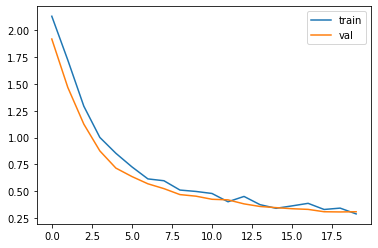

In [16]:
plt.plot(results.history["loss"])
plt.plot(results.history["val_loss"])
plt.legend(labels=["train", "val"])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  """Entry point for launching an IPython kernel.


Text(0.5, 0, 'Probability')

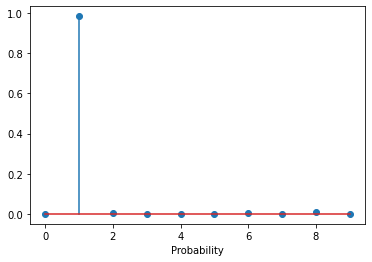

In [17]:
plt.stem(model.predict(ds_test.take(1))[9, :])
plt.xlabel("Digit")
plt.xlabel("Probability")

### Answer: By changing it, the model is more able to differentiate these images. 

In [21]:
## batch 

x,y=next(iter(ds_train.unbatch().batch(64)))


In [22]:
x.shape

TensorShape([64, 28, 28, 1])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  """Entry point for launching an IPython kernel.


<StemContainer object of 3 artists>

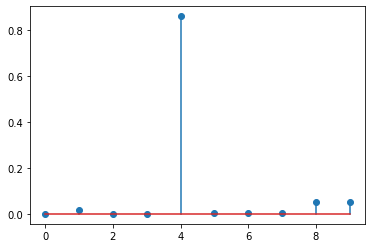

In [23]:
plt.stem(model(x)[0,:])



**Exercise - Deep CNN**

Build and fit your own CNN model with 3 convolutional **modules**, where each one contains:
  * kernel convolution 
    * you pick number of kernels
    * you pick kernel shape/size
    * you pick activation
  * pooling
  * dropout

We'll use the Fashion MNIST dataset, a low-res collection of images of clothing.

In [33]:
train, test = tf.keras.datasets.fashion_mnist.load_data()

images, labels = train
images = images/255.0
images = images[:, :, :, np.newaxis]
labels = tf.one_hot(labels.astype(np.int32),depth=10)

# optional - TF Datasets objects
# fmnist_train_ds = tf.data.Dataset.from_tensor_slices((images, labels))
# fmnist_train_ds = fmnist_train_ds.shuffle(5000).batch(32)


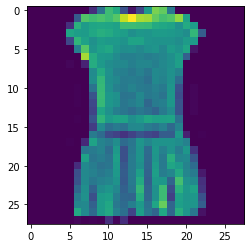

In [34]:
plt.imshow(images[3, :, :, :].squeeze())

In [27]:

model = tfk.Sequential()

model.add(tfkl.Conv2D(filters = 32, kernel_size=2, strides=2, 
                      padding="valid", activation='relu', input_shape=(28, 28, 1)))
model.add(tfkl.MaxPool2D(pool_size=2))
model.add(tfkl.Dropout(.2))


model.add(tfkl.Conv2D(filters = 16, kernel_size=2, strides=1, 
                      padding="valid", activation='relu'))
model.add(tfkl.MaxPool2D(pool_size=2))
model.add(tfkl.Dropout(.2))


model.add(tfkl.Conv2D(filters = 8, kernel_size=2, strides=1, 
                      padding="valid", activation='relu'))
model.add(tfkl.MaxPool2D(pool_size=2))
model.add(tfkl.Dropout(.2))

# flatten 
model.add(tfkl.Flatten())
model.add(tfkl.Dense(10, activation='softmax'))

In [28]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 14, 14, 32)        160       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 7, 7, 32)          0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 7, 7, 32)          0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 6, 6, 16)          2064      
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 3, 3, 16)          0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 3, 3, 16)          0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 2, 2, 8)          

In [36]:
model.compile(
    optimizer=tfk.optimizers.RMSprop(),
    loss=tfk.losses.CategoricalCrossentropy(),
)

results = model.fit(images, labels, batch_size= 35, epochs=5)

Epoch 1/5
1715/1715 [==============================] - 15s 9ms/step - loss: 0.9247
Epoch 2/5
1715/1715 [==============================] - 15s 9ms/step - loss: 0.9017
Epoch 3/5
1715/1715 [==============================] - 15s 9ms/step - loss: 0.8916
Epoch 4/5
1715/1715 [==============================] - 15s 9ms/step - loss: 0.8828
Epoch 5/5
1715/1715 [==============================] - 15s 9ms/step - loss: 0.8737


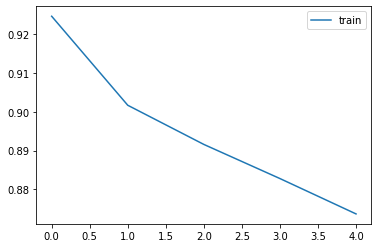

In [39]:
plt.plot(results.history["loss"])

plt.legend(labels=["train"])


#|**Exercise - Transfer Learning**



In [2]:
data, info = tfds.load('rock_paper_scissors', with_info=True)
train_data = data["train"].map(lambda x: (tf.cast(x["image"], tf.float32) / 255., tf.one_hot(x["label"], depth=3) )).batch(32)
test_data = data["train"].map(lambda x: (tf.cast(x["image"], tf.float32) / 255., tf.one_hot(x["label"], depth=3))).batch(32)

In [3]:
info.features['image'].shape

(300, 300, 3)

In [3]:
data["train"].take(500)

<TakeDataset shapes: {image: (300, 300, 3), label: ()}, types: {image: tf.uint8, label: tf.int64}>

,image,label
0,,2 (scissors)
1,,2 (scissors)
2,,0 (rock)
3,,1 (paper)
4,,0 (rock)
5,,1 (paper)
6,,2 (scissors)
7,,1 (paper)
8,,2 (scissors)
9,,2 (scissors)

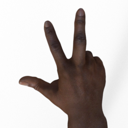
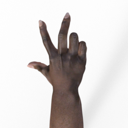
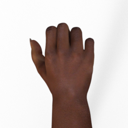
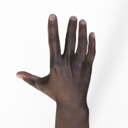
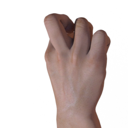
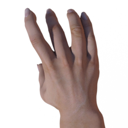
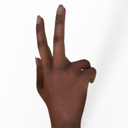
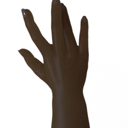
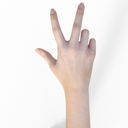
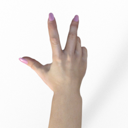

In [42]:
tfds.as_dataframe(data["train"].take(10), info)

# Exercise

1. Build a deep CNN model and train it for this binary classification task. Fit the model using the small dataset of 500 samples, *train_data*.

What accuracy can your model acheive on the training data?

In [4]:
# train and test 
ds_train = data["train"].take(500)
ds_train = ds_train.map(lambda x: (tf.cast(x["image"], tf.float32) / 255.,tf.one_hot(x["label"], depth=3))).batch(32)

train_data = train_data.take(500)
# seperate labels and data
train_image,train_labels = next(iter(ds_train))
test_image,test_labels = next(iter(test_data))

In [7]:
# model
model = tfk.Sequential()

model.add(tfkl.Conv2D(filters = 32, kernel_size=(3,3), strides=(2,2), 
                      padding="valid", activation='relu', input_shape=(300, 300, 3)))
model.add(tfkl.MaxPool2D(pool_size=(3,3)))



model.add(tfkl.Conv2D(filters = 16, kernel_size=(3,3), strides=(1,1), 
                      padding="valid", activation='relu'))
model.add(tfkl.MaxPool2D(pool_size=(3,3)))


model.add(tfkl.Conv2D(filters = 8, kernel_size=(3,3), strides=(1,1), 
                      padding="valid", activation='relu'))
model.add(tfkl.MaxPool2D(pool_size=(3,3)))


# flatten 
model.add(tfkl.Flatten())
model.add(tfkl.Dense(128, activation='relu'))
model.add(tfkl.Dense(3, activation='softmax'))

In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 149, 149, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 49, 49, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 47, 47, 16)        4624      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 15, 15, 16)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 13, 13, 8)         1160      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 4, 4, 8)           0         
_________________________________________________________________
flatten (Flatten)            (None, 128)               0

In [9]:
model.compile(
    optimizer=tfk.optimizers.RMSprop(),
    loss=tfk.losses.CategoricalCrossentropy(),
    metrics=['accuracy']

)

results = model.fit(x=train_image, y=train_labels, steps_per_epoch=10,epochs=10, validation_data=test_data,validation_steps=1)

Epoch 1/10
10/10 [==============================] - 1s 112ms/step - loss: 1.0467 - accuracy: 0.4000 - val_loss: 1.0424 - val_accuracy: 0.4688
Epoch 2/10
10/10 [==============================] - 1s 95ms/step - loss: 1.1015 - accuracy: 0.4500 - val_loss: 1.0289 - val_accuracy: 0.5000
Epoch 3/10
10/10 [==============================] - 1s 98ms/step - loss: 1.0494 - accuracy: 0.4500 - val_loss: 0.9922 - val_accuracy: 0.4688
Epoch 4/10
10/10 [==============================] - 1s 97ms/step - loss: 1.0439 - accuracy: 0.5000 - val_loss: 0.9881 - val_accuracy: 0.5312
Epoch 5/10
10/10 [==============================] - 1s 96ms/step - loss: 1.0126 - accuracy: 0.5000 - val_loss: 0.9327 - val_accuracy: 0.4688
Epoch 6/10
10/10 [==============================] - 1s 98ms/step - loss: 0.9695 - accuracy: 0.5500 - val_loss: 0.8881 - val_accuracy: 0.7188
Epoch 7/10
10/10 [==============================] - 1s 97ms/step - loss: 0.8650 - accuracy: 0.6500 - val_loss: 0.8218 - val_accuracy: 0.6250
Epoch 8/10
1

 0/10 [..............................] - 0s 0s/step - loss: 0.8897 - accuracy: 0.6250 - val_loss: 0.7273 - val_accuracy: 0.7500


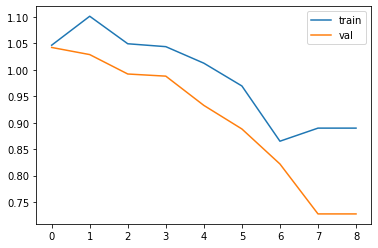

In [11]:
plt.plot(results.history["loss"])
plt.plot(results.history["val_loss"])
plt.legend(labels=["train", "val"])

 2. Now use transfer learning by incorporating the pretrained VGG16 model.

In [5]:
from tensorflow.keras.applications import VGG16

In [7]:
conv_base = VGG16(weights="imagenet",include_top=False,input_shape=(300,300,3))

Build a Sequential model, using our VGG16 base. Make sure the freeze the weights of the convolutional backbone, but leave the remainder of the network weights as learnable. Fit this model and compare the overall accuracy as well as the loss curves (efficiency).


In [8]:
model = tfk.Sequential()

model.add(conv_base)
for layer in model.layers:
    layer.trainable = False
model.add(tfkl.Flatten())
model.add(tfkl.Dense(3, activation='softmax'))

In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Functional)           (None, 9, 9, 512)         14714688  
_________________________________________________________________
flatten (Flatten)            (None, 41472)             0         
_________________________________________________________________
dense (Dense)                (None, 3)                 124419    
Total params: 14,839,107
Trainable params: 124,419
Non-trainable params: 14,714,688
_________________________________________________________________


In [10]:
model.compile(
    optimizer=tfk.optimizers.Adam(),
    loss=tfk.losses.CategoricalCrossentropy(),
    metrics=['accuracy']
)

results = model.fit(x=train_image, y=train_labels, steps_per_epoch=10,epochs=10, validation_data=test_data,validation_steps=1)

Epoch 1/10
10/10 [==============================] - 40s 4s/step - loss: 2.6861 - accuracy: 0.5250 - val_loss: 1.3361 - val_accuracy: 0.6875
Epoch 2/10
10/10 [==============================] - 40s 4s/step - loss: 0.6554 - accuracy: 0.8500 - val_loss: 0.0533 - val_accuracy: 1.0000
Epoch 3/10
10/10 [==============================] - 41s 4s/step - loss: 0.1211 - accuracy: 0.9500 - val_loss: 0.0514 - val_accuracy: 0.9688
Epoch 4/10
10/10 [==============================] - 41s 4s/step - loss: 0.0159 - accuracy: 1.0000 - val_loss: 0.0081 - val_accuracy: 1.0000
Epoch 5/10
10/10 [==============================] - 40s 4s/step - loss: 0.0137 - accuracy: 1.0000 - val_loss: 0.0055 - val_accuracy: 1.0000
Epoch 6/10
10/10 [==============================] - 41s 4s/step - loss: 0.0020 - accuracy: 1.0000 - val_loss: 0.0011 - val_accuracy: 1.0000
Epoch 7/10
10/10 [==============================] - 40s 4s/step - loss: 9.2336e-04 - accuracy: 1.0000 - val_loss: 7.2875e-04 - val_accuracy: 1.0000
Epoch 8/10
1

 0/10 [..............................] - 0s 0s/step - loss: 5.3275e-04 - accuracy: 1.0000 - val_loss: 6.0635e-04 - val_accuracy: 1.0000


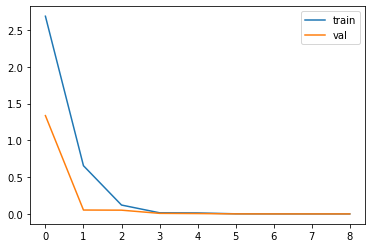

In [12]:
# plot
plt.plot(results.history["loss"])
plt.plot(results.history["val_loss"])
plt.legend(labels=["train", "val"])